<a href="https://colab.research.google.com/github/barta3235/working_model_UNET/blob/main/working_model_unet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, applications, Model
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
!pip install lime

<ipython-input-1-67b6deb1b7de>:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
os.chdir('/content/drive/MyDrive/499_brainMRI_dataset/Ohyes')
X = []
y = []
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append((i[0:1]))
      print(i[0:1])
os.chdir('/content/drive/MyDrive/499_brainMRI_dataset/noppers')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      X.append(img)
print(len(X))
for i in range(1,3245):
    y.append('N')
print(y)

  1%|          | 27/4273 [00:00<00:32, 132.20it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


  1%|          | 42/4273 [00:00<00:30, 138.57it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


  1%|▏         | 61/4273 [00:47<1:10:08,  1.00it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


  2%|▏         | 91/4273 [00:48<27:35,  2.53it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


  3%|▎         | 121/4273 [00:48<12:28,  5.54it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


  4%|▎         | 152/4273 [00:48<05:57, 11.54it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


  4%|▍         | 181/4273 [00:48<03:11, 21.41it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


  5%|▍         | 211/4273 [00:48<01:47, 37.81it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


  6%|▌         | 240/4273 [00:49<01:07, 60.01it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


  6%|▋         | 268/4273 [00:49<00:48, 82.76it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


  7%|▋         | 296/4273 [00:49<00:38, 103.13it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


  8%|▊         | 328/4273 [00:49<00:32, 122.65it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


  8%|▊         | 363/4273 [00:50<00:26, 145.09it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


  9%|▉         | 395/4273 [00:50<00:26, 144.70it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 10%|▉         | 411/4273 [00:50<00:27, 141.48it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 10%|█         | 446/4273 [00:50<00:24, 153.79it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y

 11%|█         | 479/4273 [00:50<00:24, 155.81it/s]


Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 12%|█▏        | 513/4273 [00:51<00:23, 157.53it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 13%|█▎        | 547/4273 [00:51<00:23, 158.02it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 14%|█▎        | 581/4273 [00:51<00:23, 156.13it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 14%|█▍        | 615/4273 [00:51<00:23, 154.69it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 15%|█▌        | 647/4273 [00:51<00:23, 152.85it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 16%|█▌        | 681/4273 [00:52<00:23, 155.27it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 16%|█▋        | 697/4273 [00:52<00:23, 150.58it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 17%|█▋        | 731/4273 [00:52<00:22, 155.05it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 18%|█▊        | 765/4273 [00:52<00:21, 160.59it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 19%|█▊        | 799/4273 [00:52<00:21, 160.25it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 20%|█▉        | 834/4273 [00:53<00:21, 161.74it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 20%|██        | 868/4273 [00:53<00:21, 158.84it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 21%|██        | 901/4273 [00:53<00:21, 155.92it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 22%|██▏       | 934/4273 [00:53<00:21, 158.03it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 23%|██▎       | 968/4273 [00:53<00:20, 161.19it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 23%|██▎       | 1003/4273 [00:54<00:20, 161.18it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 24%|██▍       | 1038/4273 [00:54<00:20, 160.49it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 25%|██▍       | 1055/4273 [00:54<00:20, 155.20it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 26%|██▌       | 1091/4273 [00:54<00:19, 166.40it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 26%|██▋       | 1125/4273 [00:54<00:19, 163.00it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 27%|██▋       | 1161/4273 [00:55<00:18, 165.01it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 28%|██▊       | 1195/4273 [00:55<00:19, 161.00it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 29%|██▉       | 1229/4273 [00:55<00:19, 158.51it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 30%|██▉       | 1264/4273 [00:55<00:18, 159.45it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 30%|███       | 1298/4273 [00:55<00:18, 163.69it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 31%|███       | 1334/4273 [00:56<00:17, 165.17it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 32%|███▏      | 1367/4273 [00:56<00:19, 151.26it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 32%|███▏      | 1383/4273 [00:56<00:19, 152.02it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 33%|███▎      | 1414/4273 [00:56<00:19, 145.42it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 34%|███▍      | 1444/4273 [00:56<00:20, 136.69it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 35%|███▍      | 1475/4273 [00:57<00:19, 140.43it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 35%|███▌      | 1506/4273 [00:57<00:19, 144.43it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 36%|███▌      | 1537/4273 [00:57<00:19, 143.53it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 36%|███▋      | 1552/4273 [00:57<00:20, 135.26it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 37%|███▋      | 1579/4273 [00:58<00:23, 116.39it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 38%|███▊      | 1603/4273 [00:58<00:23, 115.70it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 38%|███▊      | 1631/4273 [00:58<00:21, 123.91it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y

 39%|███▉      | 1659/4273 [00:58<00:20, 129.52it/s]


Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 40%|███▉      | 1688/4273 [00:58<00:19, 133.14it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 40%|████      | 1717/4273 [00:59<00:18, 135.17it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 41%|████      | 1747/4273 [00:59<00:18, 137.49it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 42%|████▏     | 1777/4273 [00:59<00:18, 133.38it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 42%|████▏     | 1805/4273 [00:59<00:18, 134.71it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 43%|████▎     | 1819/4273 [00:59<00:18, 131.40it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 43%|████▎     | 1847/4273 [01:00<00:18, 134.78it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 44%|████▍     | 1876/4273 [01:00<00:17, 134.48it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 45%|████▍     | 1905/4273 [01:00<00:18, 131.41it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 45%|████▌     | 1934/4273 [01:00<00:17, 136.51it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 46%|████▌     | 1963/4273 [01:00<00:17, 135.71it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 47%|████▋     | 1993/4273 [01:01<00:16, 138.96it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 47%|████▋     | 2025/4273 [01:01<00:15, 147.39it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 48%|████▊     | 2058/4273 [01:01<00:14, 150.27it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 49%|████▉     | 2095/4273 [01:01<00:13, 164.94it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 50%|████▉     | 2129/4273 [01:01<00:13, 163.19it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 51%|█████     | 2164/4273 [01:02<00:12, 164.42it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 51%|█████     | 2181/4273 [01:02<00:13, 155.57it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 52%|█████▏    | 2216/4273 [01:02<00:12, 160.51it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 53%|█████▎    | 2249/4273 [01:02<00:13, 148.98it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 53%|█████▎    | 2280/4273 [01:02<00:13, 144.54it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 54%|█████▍    | 2310/4273 [01:03<00:13, 140.48it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 55%|█████▍    | 2342/4273 [01:03<00:13, 140.59it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 56%|█████▌    | 2372/4273 [01:03<00:13, 144.43it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 56%|█████▋    | 2404/4273 [01:03<00:12, 150.22it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 57%|█████▋    | 2437/4273 [01:04<00:11, 153.44it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 58%|█████▊    | 2469/4273 [01:04<00:11, 150.50it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 59%|█████▊    | 2505/4273 [01:04<00:10, 162.22it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y

 59%|█████▉    | 2538/4273 [01:04<00:11, 155.73it/s]


Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 60%|█████▉    | 2554/4273 [01:04<00:11, 150.50it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 60%|██████    | 2585/4273 [01:05<00:11, 146.91it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 61%|██████    | 2615/4273 [01:05<00:11, 141.81it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 62%|██████▏   | 2644/4273 [01:05<00:12, 135.40it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y

 63%|██████▎   | 2673/4273 [01:05<00:11, 135.53it/s]


Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y

 63%|██████▎   | 2704/4273 [01:05<00:11, 142.08it/s]


Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 64%|██████▍   | 2734/4273 [01:06<00:11, 134.26it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 64%|██████▍   | 2749/4273 [01:06<00:11, 137.98it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 65%|██████▌   | 2778/4273 [01:06<00:10, 137.54it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 66%|██████▌   | 2807/4273 [01:06<00:10, 133.53it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 66%|██████▋   | 2835/4273 [01:06<00:10, 130.82it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 67%|██████▋   | 2866/4273 [01:07<00:10, 140.51it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 68%|██████▊   | 2897/4273 [01:07<00:09, 138.28it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 68%|██████▊   | 2927/4273 [01:07<00:09, 137.17it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y

 69%|██████▉   | 2959/4273 [01:07<00:09, 139.61it/s]


Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 70%|██████▉   | 2989/4273 [01:07<00:09, 142.17it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 70%|███████   | 3004/4273 [01:08<00:09, 132.06it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 71%|███████   | 3033/4273 [01:08<00:09, 136.91it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 72%|███████▏  | 3061/4273 [01:08<00:09, 131.93it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 72%|███████▏  | 3089/4273 [01:08<00:09, 129.00it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 73%|███████▎  | 3120/4273 [01:08<00:08, 138.85it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 74%|███████▎  | 3148/4273 [01:09<00:08, 129.92it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 74%|███████▍  | 3176/4273 [01:09<00:08, 131.87it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 75%|███████▍  | 3204/4273 [01:09<00:07, 135.03it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 76%|███████▌  | 3234/4273 [01:09<00:07, 136.94it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 76%|███████▋  | 3266/4273 [01:10<00:06, 149.23it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 77%|███████▋  | 3300/4273 [01:10<00:06, 155.11it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 78%|███████▊  | 3334/4273 [01:10<00:06, 155.68it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 79%|███████▉  | 3369/4273 [01:10<00:05, 162.97it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 80%|███████▉  | 3402/4273 [01:10<00:05, 157.93it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 80%|████████  | 3435/4273 [01:11<00:05, 157.30it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 81%|████████  | 3451/4273 [01:11<00:05, 154.18it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 82%|████████▏ | 3485/4273 [01:11<00:04, 158.92it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 82%|████████▏ | 3518/4273 [01:11<00:04, 155.85it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 83%|████████▎ | 3551/4273 [01:11<00:04, 156.52it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 84%|████████▍ | 3586/4273 [01:12<00:04, 158.50it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 85%|████████▍ | 3622/4273 [01:12<00:04, 159.00it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 86%|████████▌ | 3657/4273 [01:12<00:03, 161.98it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 86%|████████▋ | 3691/4273 [01:12<00:03, 163.11it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 87%|████████▋ | 3726/4273 [01:12<00:03, 164.32it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 88%|████████▊ | 3762/4273 [01:13<00:03, 166.27it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 89%|████████▉ | 3795/4273 [01:13<00:03, 156.68it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 89%|████████▉ | 3812/4273 [01:13<00:02, 160.22it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 90%|████████▉ | 3845/4273 [01:13<00:02, 153.49it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 91%|█████████ | 3879/4273 [01:13<00:02, 157.45it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 92%|█████████▏| 3913/4273 [01:14<00:02, 155.64it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y

 92%|█████████▏| 3945/4273 [01:14<00:02, 147.58it/s]


Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 93%|█████████▎| 3978/4273 [01:14<00:01, 152.33it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y

 94%|█████████▍| 4015/4273 [01:14<00:01, 162.48it/s]


Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 95%|█████████▍| 4051/4273 [01:14<00:01, 159.21it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 95%|█████████▌| 4068/4273 [01:15<00:01, 149.42it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 96%|█████████▌| 4103/4273 [01:15<00:01, 150.46it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 97%|█████████▋| 4135/4273 [01:15<00:01, 137.23it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 97%|█████████▋| 4150/4273 [01:15<00:01, 115.08it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 97%|█████████▋| 4163/4273 [01:16<00:01, 92.36it/s] 

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 98%|█████████▊| 4174/4273 [01:16<00:01, 87.83it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 98%|█████████▊| 4193/4273 [01:16<00:00, 81.10it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y

 99%|█████████▊| 4214/4273 [01:16<00:00, 86.85it/s]


Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


 99%|█████████▉| 4238/4273 [01:16<00:00, 101.98it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


100%|█████████▉| 4265/4273 [01:17<00:00, 116.17it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


100%|██████████| 4273/4273 [01:17<00:00, 55.42it/s] 


Y
Y


100%|██████████| 3244/3244 [00:57<00:00, 56.88it/s] 

7517
['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',

In [32]:
print(len(X))
print(len(y))

7517
7517


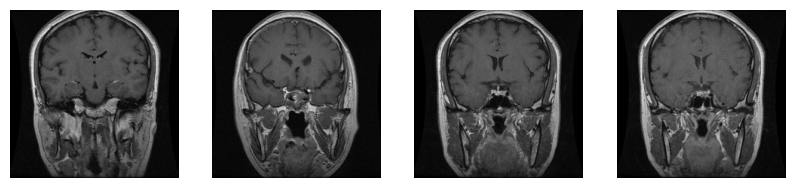

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)


In [51]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)


X_train Shape:  (5036, 224, 224, 3)
X_test Shape:  (2481, 224, 224, 3)
y_train Shape:  (5036, 2)
y_test Shape:  (2481, 2)


In [7]:
!pip install efficientnet

In [104]:
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras import layers, models, Input

def get_efficientnet_encoder(input_shape):
    base_model = EfficientNetB4(include_top=False, input_shape=input_shape, weights='imagenet')
    # Freeze the layers of the EfficientNet model to retain pre-trained weights
    for layer in base_model.layers:
        layer.trainable = False
    return base_model

def build_advanced_unet_classification_model(input_shape=(224, 224, 3), num_classes=2):
    inputs = Input(shape=input_shape)

    # Encoder
    encoder = get_efficientnet_encoder(input_shape)
    encoder_output = encoder(inputs)

    # Intermediate Complex Block
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(encoder_output)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Dropout(0.5)(x)

    # Decoder
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)

    # Reshape to match a small spatial dimension before upsampling
    x = layers.Reshape((1, 1, 1024))(x)

    # Upsample to a small spatial dimension
    x = layers.UpSampling2D(size=(7, 7))(x)

    # Concatenate along the channel axis with the original encoder output for feature fusion
    x = layers.Concatenate(axis=-1)([x, encoder_output])

    # Additional Convolutional Processing
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)

    # Flatten for classification
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)

    return model

model = build_advanced_unet_classification_model(input_shape=(224, 224, 3), num_classes=2)
model.summary()


Model: "model_36"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_70 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 efficientnetb4 (Functional  (None, 7, 7, 1792)           1767382   ['input_70[0][0]']            
 )                                                        3                                       
                                                                                                  
 conv2d_145 (Conv2D)         (None, 7, 7, 512)            8258048   ['efficientnetb4[0][0]']      
                                                                                                  
 batch_normalization_110 (B  (None, 7, 7, 512)            2048      ['conv2d_145[0][0]']   

In [105]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',
                       tf.keras.metrics.TrueNegatives(),
                       tf.keras.metrics.FalsePositives(),
                       tf.keras.metrics.SpecificityAtSensitivity(0.5)])

In [106]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    validation_data=(X_test, y_test),
                    verbose=1,
                    initial_epoch=0)

Epoch 1/5
158/158 [==============================] - 1221s 8s/step - loss: 0.2044 - accuracy: 0.9339 - true_negatives_12: 4703.0000 - false_positives_12: 333.0000 - specificity_at_sensitivity_12: 0.9929 - val_loss: 0.1324 - val_accuracy: 0.9569 - val_true_negatives_12: 2374.0000 - val_false_positives_12: 107.0000 - val_specificity_at_sensitivity_12: 0.9940
Epoch 2/5
158/158 [==============================] - 1212s 8s/step - loss: 0.1013 - accuracy: 0.9641 - true_negatives_12: 4855.0000 - false_positives_12: 181.0000 - specificity_at_sensitivity_12: 0.9982 - val_loss: 0.1010 - val_accuracy: 0.9710 - val_true_negatives_12: 2409.0000 - val_false_positives_12: 72.0000 - val_specificity_at_sensitivity_12: 0.9964
Epoch 3/5
158/158 [==============================] - 1216s 8s/step - loss: 0.0716 - accuracy: 0.9758 - true_negatives_12: 4914.0000 - false_positives_12: 122.0000 - specificity_at_sensitivity_12: 0.9990 - val_loss: 0.0904 - val_accuracy: 0.9730 - val_true_negatives_12: 2414.0000 - v

In [107]:
model.save('/content/drive/MyDrive/work_temp/model_unet_eff_new')

**LIME Explanantion**

**Test One**

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


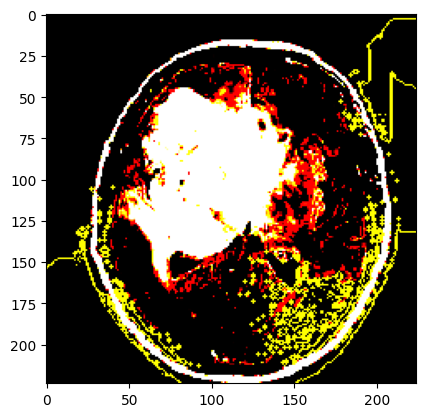

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from lime import lime_image
from skimage.segmentation import mark_boundaries

# Function to load and preprocess the image
def load_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    # Adjust preprocessing as needed for your model
    img = preprocess_input(img)  # Make sure this matches your model's expected input
    return img

# Adjust this prediction function as per your model's requirements
def predict(model, img_array):
    preds = model.predict(img_array)
    return preds

# Function to explain an instance with LIME
def explain_instance_with_lime(model, img_path, top_labels=2, hide_color=0, num_samples=100):
    explainer = lime_image.LimeImageExplainer()
    img = load_image(img_path)
    explanation = explainer.explain_instance(img[0].astype('double'),
                                             classifier_fn=lambda x: predict(model, x),
                                             top_labels=top_labels,
                                             hide_color=hide_color,
                                             num_samples=num_samples)
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    plt.show()

# Assuming 'model' is your fine-tuned model with the provided compilation parameters

# Path to your test image
img_path = '/content/drive/MyDrive/sampleImagesToTest/Y2.jpg'  # Update this with the actual path to your image

# Use the function to explain a prediction
explain_instance_with_lime(model, img_path)


**Test Two**

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


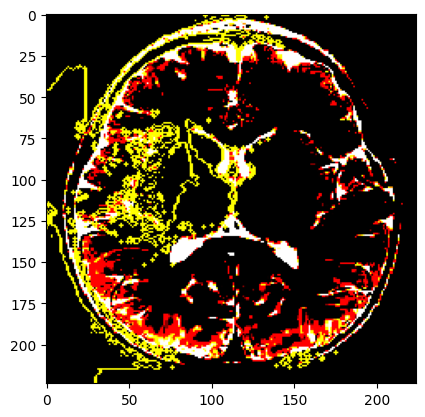

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from lime import lime_image
from skimage.segmentation import mark_boundaries

# Function to load and preprocess the image
def load_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    # Adjust preprocessing as needed for your model
    img = preprocess_input(img)  # Make sure this matches your model's expected input
    return img

# Adjust this prediction function as per your model's requirements
def predict(model, img_array):
    preds = model.predict(img_array)
    return preds

# Function to explain an instance with LIME
def explain_instance_with_lime(model, img_path, top_labels=2, hide_color=0, num_samples=100):
    explainer = lime_image.LimeImageExplainer()
    img = load_image(img_path)
    explanation = explainer.explain_instance(img[0].astype('double'),
                                             classifier_fn=lambda x: predict(model, x),
                                             top_labels=top_labels,
                                             hide_color=hide_color,
                                             num_samples=num_samples)
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    plt.show()

# Assuming 'model' is your fine-tuned model with the provided compilation parameters

# Path to your test image
img_path = '/content/drive/MyDrive/sampleImagesToTest/4 no.jpg'  # Update this with the actual path to your image

# Use the function to explain a prediction
explain_instance_with_lime(model, img_path)


**Test 3**

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 372ms/step


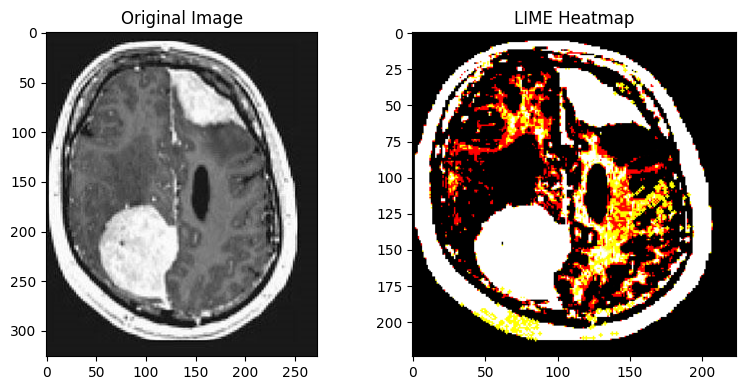

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from lime import lime_image
from skimage.segmentation import mark_boundaries

# Load the pre-trained VGG16 model from your drive
model = load_model('/content/drive/MyDrive/work_temp/model_vgg16_new')

# Load and preprocess the image
def load_image(img_path, model_preprocess=preprocess_input, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = model_preprocess(img_array)
    return img_array

# Specify the path to your image
img_path = '/content/drive/MyDrive/sampleImagesToTest/Y2N (21).jpg'
img_array = load_image(img_path)

# Initialize a LimeImageExplainer
explainer = lime_image.LimeImageExplainer()

# Explain the prediction of the model on the input image
explanation = explainer.explain_instance(img_array[0], model.predict, top_labels=2, hide_color=0, num_samples=100)

# Get the mask for the explanation of the top class (assuming binary classification)
temp, mask = explanation.get_image_and_mask(model.predict(img_array).argmax(axis=1)[0], positive_only=True, negative_only=False, hide_rest=False)

# Plot the original image and the explanation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Original image
ax1.imshow(image.load_img(img_path))
ax1.set_title('Original Image')

# Lime heatmap
ax2.imshow(mark_boundaries(temp / 2 + 0.5, mask))
ax2.set_title('LIME Heatmap')

plt.tight_layout()
plt.show()


**Super Pixel Boundaries**

**Test One**

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 3s 3s/step


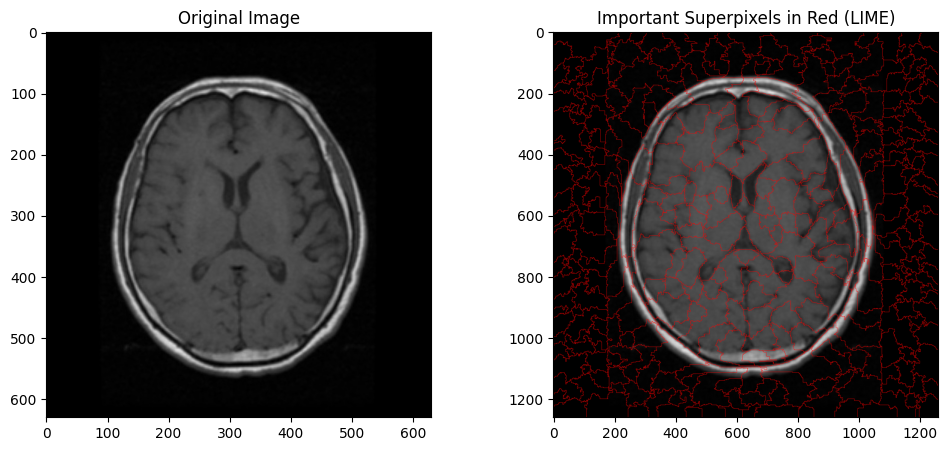

In [111]:
import tensorflow as tf
import numpy as np
from skimage.segmentation import mark_boundaries
from lime.lime_image import LimeImageExplainer
import cv2  # Import OpenCV for image processing
import matplotlib.pyplot as plt

def predict_fn(images):
    images = np.array([cv2.resize(img, (224, 224)) for img in images])
    predictions = model.predict(images)
    return predictions

explainer = LimeImageExplainer()

sample_index = 0
selected_image_path = '/content/drive/MyDrive/sampleImagesToTest/48 no.jpeg'  # Specify the file path to the image
selected_label = 'Y'

selected_image = cv2.imread(selected_image_path)  # Load the image using OpenCV

explanation = explainer.explain_instance(selected_image, predict_fn, top_labels=1, num_samples=100)

perturbed_image = explanation.segments

superpixel_boundaries = mark_boundaries(selected_image, perturbed_image, color=(1, 0, 0), mode='subpixel')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(selected_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(superpixel_boundaries)
plt.title('Important Superpixels in Red (LIME)')
plt.show()


**Test Two**

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 4s 4s/step


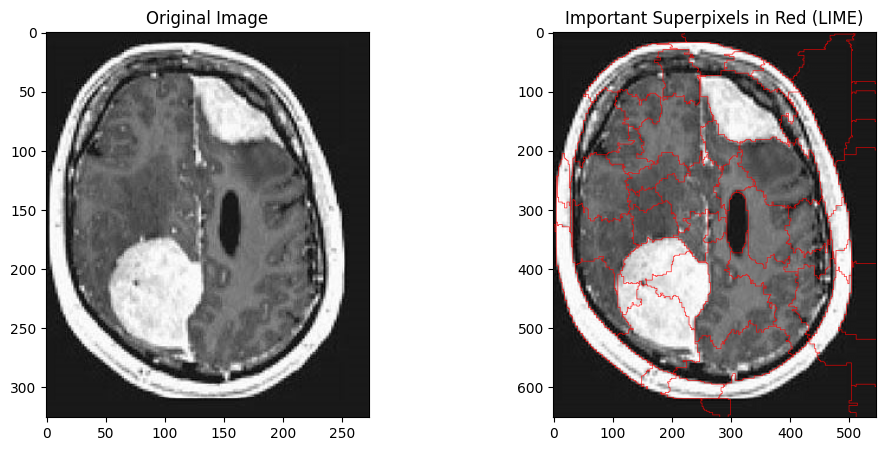

In [113]:
import tensorflow as tf
import numpy as np
from skimage.segmentation import mark_boundaries
!pip install lime
from lime.lime_image import LimeImageExplainer
import cv2
import matplotlib.pyplot as plt

# Load your pre-trained model
model_path = '/content/drive/MyDrive/work_temp/model_vgg16_new'  # Update with your model path
model = tf.keras.models.load_model(model_path)

def predict_fn(images):
    images = np.array([cv2.resize(img, (224, 224)) for img in images])
    predictions = model.predict(images)
    return predictions

explainer = LimeImageExplainer()

sample_index = 0
selected_image_path = '/content/drive/MyDrive/sampleImagesToTest/Y2N (21).jpg'  # Specify the file path to the image
selected_label = 'Y'

selected_image = cv2.imread(selected_image_path)  # Load the image using OpenCV

explanation = explainer.explain_instance(selected_image, predict_fn, top_labels=1, num_samples=1000)

perturbed_image = explanation.segments

superpixel_boundaries = mark_boundaries(selected_image, perturbed_image, color=(1, 0, 0), mode='subpixel')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(selected_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(superpixel_boundaries)
plt.title('Important Superpixels in Red (LIME)')
plt.show()


**Testing Model**

In [114]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np

# Specify the path to your model
model_path = '/content/drive/MyDrive/work_temp/model_unet_eff_new'

# Load the pre-trained model
model = load_model(model_path)

# Specify the path to the uploaded image
uploaded_image_path = '/content/drive/MyDrive/sampleImagesToTest/Y2.jpg'

# Load and preprocess the image
img = image.load_img(uploaded_image_path, target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)

# Make the prediction
prediction = model.predict(img)

# Interpret the prediction
if prediction[0][0] > prediction[0][1]:
    result = "No Tumor"
else:
    result = "Tumor"

print("Prediction: ", result)


1/1 [==============================] - 2s 2s/step
Prediction:  Tumor


In [115]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np

# Specify the path to your model
model_path = '/content/drive/MyDrive/work_temp/model_unet_eff_new'

# Load the pre-trained model
model = load_model(model_path)

# Specify the path to the uploaded image
uploaded_image_path = '/content/drive/MyDrive/sampleImagesToTest/4 no.jpg'

# Load and preprocess the image
img = image.load_img(uploaded_image_path, target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)

# Make the prediction
prediction = model.predict(img)

# Interpret the prediction
if prediction[0][0] > prediction[0][1]:
    result = "No Tumor"
else:
    result = "Tumor"

print("Prediction: ", result)


1/1 [==============================] - 2s 2s/step
Prediction:  No Tumor


**Grad-CAM**

**Test One**

In [120]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np

# Specify the path to your model
model_path = '/content/drive/MyDrive/work_temp/model_unet_eff_new'

# Load the pre-trained model
model = load_model(model_path)

# Specify the path to the uploaded image
uploaded_image_path = '/content/drive/MyDrive/sampleImagesToTest/Y2.jpg'

# Load and preprocess the image
img = image.load_img(uploaded_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array_expanded_dims = np.expand_dims(img_array, axis=0)
img = preprocess_input(img_array_expanded_dims)

# Make the prediction
prediction = model.predict(img)

# Interpret the prediction
probability = prediction[0][1]
if probability > 0.5:
    result = "Tumor"
else:
    result = "No Tumor"

print("Prediction: ", result)
print("Probability: {:.2f}%".format(probability * 100))


1/1 [==============================] - 2s 2s/step
Prediction:  No Tumor
Probability: 0.00%


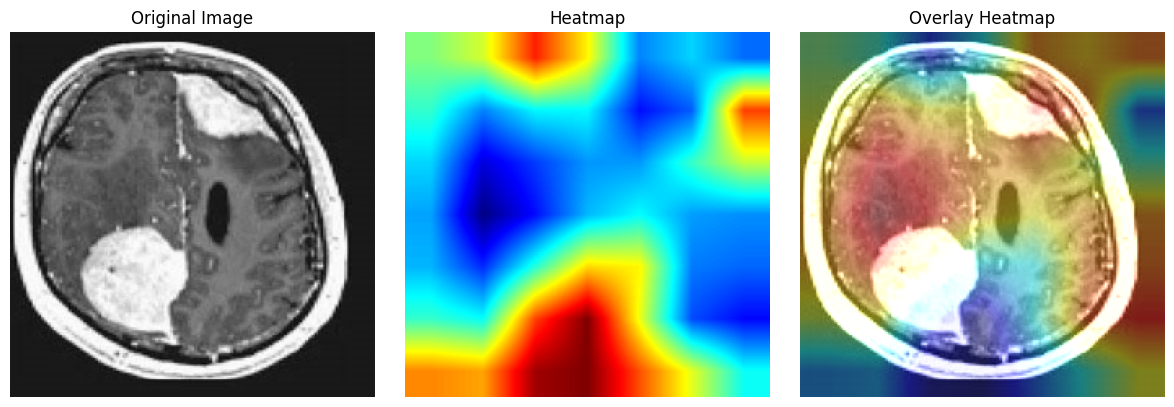

<Figure size 640x480 with 0 Axes>

In [124]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import cv2


# Preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded_dims)

model_path = '/content/drive/MyDrive/work_temp/model_unet_eff_new'

# Load the pre-trained model
model = load_model(model_path)

# Load and preprocess your image
img_path = '/content/drive/MyDrive/sampleImagesToTest/Y2N (21).jpg'  # Update with your path
preprocessed_img = load_preprocess_image(img_path)

# Grad-CAM algorithm
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Create the heatmap
last_conv_layer_name = 'conv2d_145'  # Update with your last conv layer name
heatmap = make_gradcam_heatmap(preprocessed_img, model, last_conv_layer_name)

# Superimpose the heatmap over the original image
def save_and_display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to the same size as model input
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))  # Resize heatmap
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)

    # Create a figure to display original, heatmap, and overlay
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Heatmap
    plt.subplot(1, 3, 2)
    plt.imshow(heatmap)
    plt.title('Heatmap')
    plt.axis('off')

    # Overlay
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('Overlay Heatmap')
    plt.axis('off')

    # Show and save the figure
    plt.tight_layout()
    plt.show()
    plt.savefig('/content/drive/MyDrive/work_temp/gradcam_composite_unett2.jpg')

# Apply Grad-CAM
save_and_display_gradcam(img_path, heatmap)


**Test Two**

In [116]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np

# Specify the path to your model
model_path = '/content/drive/MyDrive/work_temp/model_unet_eff_new'

# Load the pre-trained model
model = load_model(model_path)

# Specify the path to the uploaded image
uploaded_image_path = '/content/drive/MyDrive/sampleImagesToTest/Tr-no_0205.jpg'

# Load and preprocess the image
img = image.load_img(uploaded_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array_expanded_dims = np.expand_dims(img_array, axis=0)
img = preprocess_input(img_array_expanded_dims)

# Make the prediction
prediction = model.predict(img)

# Interpret the prediction
probability = prediction[0][1]
if probability > 0.5:
    result = "Tumor"
else:
    result = "No Tumor"

print("Prediction: ", result)
print("Probability: {:.2f}%".format(probability * 100))


1/1 [==============================] - 2s 2s/step
Prediction:  No Tumor
Probability: 0.00%


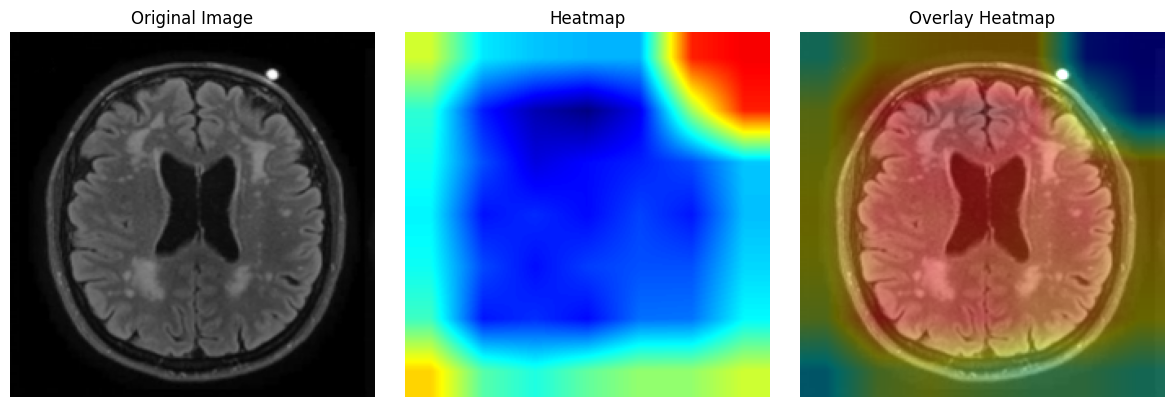

<Figure size 640x480 with 0 Axes>

In [125]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import cv2

# Specify the path to your model
model_path = '/content/drive/MyDrive/work_temp/model_unet_eff_new'

# Load the pre-trained model
model = load_model(model_path)

# Preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded_dims)

# Load and preprocess your image
img_path = '/content/drive/MyDrive/sampleImagesToTest/Tr-no_0205.jpg'  # Update with your path
preprocessed_img = load_preprocess_image(img_path)

# Grad-CAM algorithm
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Create the heatmap
last_conv_layer_name = 'conv2d_145'  # Update with your last conv layer name
heatmap = make_gradcam_heatmap(preprocessed_img, model, last_conv_layer_name)

# Superimpose the heatmap over the original image
def save_and_display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to the same size as model input
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))  # Resize heatmap
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)

    # Create a figure to display original, heatmap, and overlay
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Heatmap
    plt.subplot(1, 3, 2)
    plt.imshow(heatmap)
    plt.title('Heatmap')
    plt.axis('off')

    # Overlay
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('Overlay Heatmap')
    plt.axis('off')

    # Show and save the figure
    plt.tight_layout()
    plt.show()
    plt.savefig('/content/drive/MyDrive/work_temp/gradcam_composite_unet.jpg')

# Apply Grad-CAM
save_and_display_gradcam(img_path, heatmap)
